# PART 1. Data Pre-processing

In [1]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

Using TensorFlow backend.
C:\Users\zubai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zubai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zubai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zubai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
data=pd.read_csv('dataSet.csv', parse_dates = True, index_col = 'DATE')

In [3]:
data.head()

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
DATE,,,,,,,,,
1948-08-01,USC00186350,"NATIONAL ARBORETUM DC, MD US",2.70,0.0,0.0,74.0,67.0,NaN,NaN
1948-08-02,USC00186350,"NATIONAL ARBORETUM DC, MD US",0.12,0.0,0.0,88.0,67.0,NaN,NaN
1948-08-03,USC00186350,"NATIONAL ARBORETUM DC, MD US",0.13,0.0,0.0,87.0,70.0,NaN,NaN
1948-08-04,USC00186350,"NATIONAL ARBORETUM DC, MD US",1.92,0.0,0.0,82.0,68.0,NaN,NaN
1948-08-05,USC00186350,"NATIONAL ARBORETUM DC, MD US",0.00,0.0,0.0,80.0,66.0,NaN,NaN


In [4]:
data.tail()

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
DATE,,,,,,,,,
2020-07-27,USC00186350,"NATIONAL ARBORETUM DC, MD US",0.00,0.0,0.0,95.0,75.0,79.0,NaN
2020-07-28,USC00186350,"NATIONAL ARBORETUM DC, MD US",0.00,0.0,0.0,96.0,77.0,84.0,NaN
2020-07-29,USC00186350,"NATIONAL ARBORETUM DC, MD US",0.00,0.0,0.0,93.0,73.0,78.0,NaN
2020-07-30,USC00186350,"NATIONAL ARBORETUM DC, MD US",0.00,0.0,0.0,93.0,76.0,83.0,NaN
2020-07-31,USC00186350,"NATIONAL ARBORETUM DC, MD US",0.22,0.0,0.0,95.0,73.0,74.0,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25559 entries, 1948-08-01 to 2020-07-31
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  25559 non-null  object 
 1   NAME     25559 non-null  object 
 2   PRCP     25355 non-null  float64
 3   SNOW     23278 non-null  float64
 4   SNWD     22365 non-null  float64
 5   TMAX     25223 non-null  float64
 6   TMIN     25175 non-null  float64
 7   TOBS     25245 non-null  float64
 8   WESD     397 non-null    float64
dtypes: float64(7), object(2)
memory usage: 1.9+ MB


In [6]:
#checking missing values
data.isna().sum()

STATION        0
NAME           0
PRCP         204
SNOW        2281
SNWD        3194
TMAX         336
TMIN         384
TOBS         314
WESD       25162
dtype: int64

In [7]:
#filling missing values with mean
data=data.fillna(data.mean())

In [8]:
data['NAME'].value_counts()

NATIONAL ARBORETUM DC, MD US    25559
Name: NAME, dtype: int64

In [9]:
data['STATION'].value_counts()

USC00186350    25559
Name: STATION, dtype: int64

In [10]:
# removing the last column it does not contain any value and we also analysis the Name AND station column is just contain one value.
data=data.iloc[:,[ 2,3,4,5,6,7]]

In [11]:
data.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
DATE,,,,,,
1948-08-01,2.70,0.0,0.0,74.0,67.0,55.775797
1948-08-02,0.12,0.0,0.0,88.0,67.0,55.775797
1948-08-03,0.13,0.0,0.0,87.0,70.0,55.775797
1948-08-04,1.92,0.0,0.0,82.0,68.0,55.775797
1948-08-05,0.00,0.0,0.0,80.0,66.0,55.775797


In [12]:
data.reset_index(inplace=True)

In [13]:
data.head()

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
0,1948-08-01,2.70,0.0,0.0,74.0,67.0,55.775797
1,1948-08-02,0.12,0.0,0.0,88.0,67.0,55.775797
2,1948-08-03,0.13,0.0,0.0,87.0,70.0,55.775797
3,1948-08-04,1.92,0.0,0.0,82.0,68.0,55.775797
4,1948-08-05,0.00,0.0,0.0,80.0,66.0,55.775797


In [14]:
data['DATE']=data['DATE'].astype(str) 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25559 entries, 0 to 25558
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25559 non-null  object 
 1   PRCP    25559 non-null  float64
 2   SNOW    25559 non-null  float64
 3   SNWD    25559 non-null  float64
 4   TMAX    25559 non-null  float64
 5   TMIN    25559 non-null  float64
 6   TOBS    25559 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.4+ MB


In [16]:
cols = list(data)[1:6]
cols

['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']

In [17]:
# Select features (columns) to be involved intro training and predictions
cols = list(data)[1:6]

# Extract dates (will be used in visualization)
datelist_train = list(data['DATE'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(data.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (25559, 7)
All timestamps == 25559
Featured selected: ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']


<h3>Step #2. Data pre-processing</h3>
<p>
Removing all commas and convert data to matrix shape format.
</p>

In [18]:
data = data[cols].astype(str)
for i in cols:
    for j in range(0, len(data)):
        data[i][j] = data[i][j].replace(',', '')

data = data.astype(float)

# Using multiple features (predictors)
training_set = data.values

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (25559, 5).


array([[ 2.7 ,  0.  ,  0.  , 74.  , 67.  ],
       [ 0.12,  0.  ,  0.  , 88.  , 67.  ],
       [ 0.13,  0.  ,  0.  , 87.  , 70.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , 93.  , 73.  ],
       [ 0.  ,  0.  ,  0.  , 93.  , 76.  ],
       [ 0.22,  0.  ,  0.  , 95.  , 73.  ]])

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[ 7.69850133e+00],
       [ 4.38951773e-03],
       [ 3.42116566e-02],
       ...,
       [-3.53476148e-01],
       [-3.53476148e-01],
       [ 3.02610906e-01]])

In [20]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 365   # Number of days we want top predict into the future
n_past = 450     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:data.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (24745, 450, 4).
y_train shape == (24745, 1).


<h2>PART 2. Create a model. Training</h2>

<h3>Step #3. Building the LSTM based Neural Network</h3>

In [21]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [22]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, data.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

<h3>Step #4. Start training</h3>

In [23]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=5, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)


Train on 19796 samples, validate on 4949 samples


Epoch 1/5
19796/19796 [==============================] - 165s 8ms/step - loss: 0.9881 - val_loss: 1.0330

Epoch 00001: val_loss improved from inf to 1.03302, saving model to weights.h5

Epoch 2/5
19796/19796 [==============================] - 180s 9ms/step - loss: 0.9823 - val_loss: 1.0316

Epoch 00002: val_loss improved from 1.03302 to 1.03160, saving model to weights.h5
Epoch 3/5
19796/19796 [==============================] - 176s 9ms/step - loss: 0.9826 - val_loss: 1.0325

Epoch 00003: val_loss did not improve from 1.03160
Epoch 4/5
19796/19796 [==============================] - 174s 9ms/step - loss: 0.9821 - val_loss: 1.0313

Epoch 00004: val_loss improved from 1.03160 to 1.03126, saving model to weights.h5
Epoch 5/5
19796/19796 [==============================] - 175s 9ms/step - loss: 0.9824 - val_loss: 1.0312

Epoch 00005: val_loss improved from 1.03126 to 1.03118, saving model to weights.h5
Wall time: 14min 33s


<h2>PART 3. Make future predictions</h2>

In [24]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

<h3>Step #5. Make predictions for future dates</h3>

In [25]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [26]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['TMAX']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['TMAX']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(10)

,TMAX
1952-01-17,0.112255
1952-01-18,0.114079
1952-01-19,0.116362
1952-01-20,0.118398
1952-01-21,0.119545
1952-01-22,0.118126
1952-01-23,0.116413
1952-01-24,0.115036
1952-01-25,0.114265
1952-01-26,0.112979


In [38]:
# Parse training set timestamp for better visualization
data = pd.DataFrame(data, columns=cols)
data.index = datelist_train
data.index = pd.to_datetime(data.index)

In [39]:
PREDICTIONS_FUTURE.index

DatetimeIndex(['2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03',
               '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07',
               '2020-08-08', '2020-08-09',
               ...
               '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
               '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30'],
              dtype='datetime64[ns]', length=365, freq=None)

<h3>Step #6. Visualize the Predictions</h3>

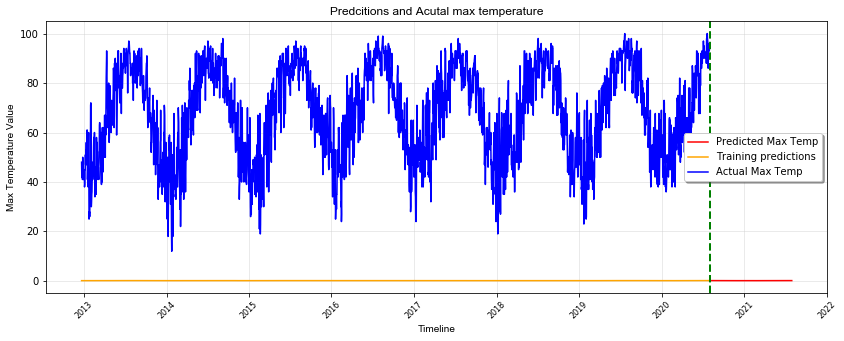

In [47]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-12-21'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['TMAX'], color='r', label='Predicted Max Temp')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['TMAX'], color='orange', label='Training predictions')
plt.plot(data.loc[START_DATE_FOR_PLOTTING:].index, data.loc[START_DATE_FOR_PLOTTING:]['TMAX'], color='b', label='Actual Max Temp')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal max temperature', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Max Temperature Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()